## Importing libs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Dataset

In [ ]:
data_frame = pd.read_csv("IRIS.csv")

In [ ]:
data_frame.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Show the unique values of the 'species' column
unique_values = data_frame['species'].unique()
print(unique_values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
# Delete rows where species = "iris-setosa"
#IRIS dataset has three species ; i had to delete one to fit our use case
df = data_frame[data_frame['species'] != 'Iris-setosa']

<ipython-input-213-a7bd60d51ad8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

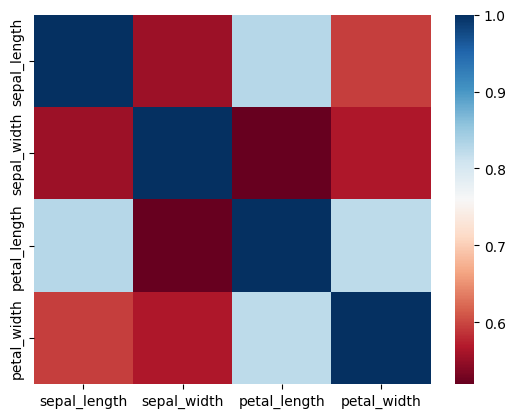

In [ ]:
#Correlation Matrix
corr = df.corr()
sns.heatmap(corr, cmap="RdBu")

In [ ]:
#Changing species type into int ; iris-versicolor is 1 and iris-verginica is 0
df["species"] = (df["species"] == 'Iris-versicolor').astype(int)

<ipython-input-214-49f1cfd7c82f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"] = (df["species"] == 'Iris-versicolor').astype(int)


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


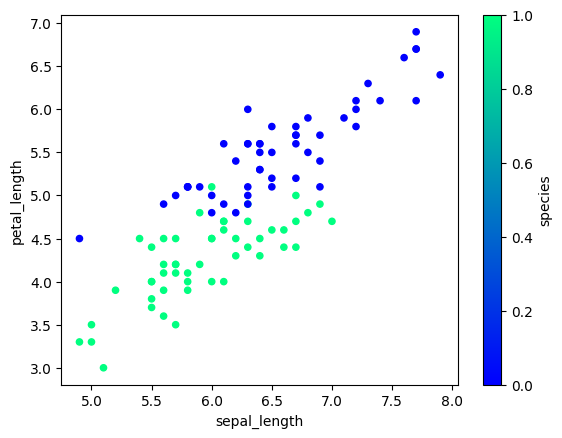

In [ ]:
df.plot.scatter(x='sepal_length',y='petal_length', c='species', cmap='winter')
plt.show()

In [ ]:
df["species"].value_counts()

1    50
0    50
Name: species, dtype: int64

In [ ]:
X = df[['sepal_length', 'petal_length']].values
y = df[['species']].values

## Logistic Regression from scratch

### Model

In [ ]:
# Sigmoide function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [ ]:
# Model
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

### Cost Function

In [ ]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### Gradient Descent

In [ ]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [ ]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### Prediction

In [ ]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### Final Model

In [ ]:
def logistic_regression(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Errors Evolution')
    return W,b

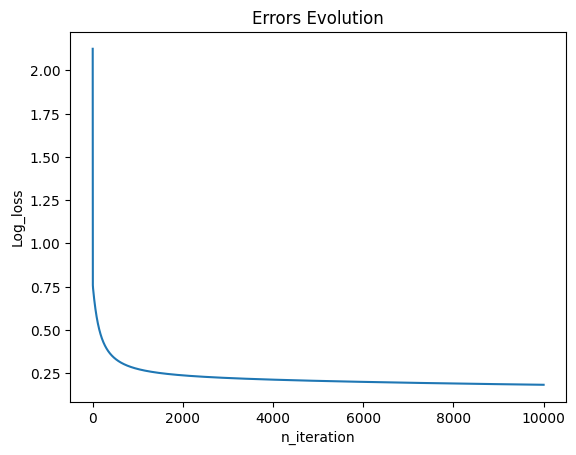

In [ ]:
W,b=logistic_regression(X, y)

### Model Evaluation & Visualisation

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = predict(X, W, b)
print("Accuracy=",accuracy_score(y, y_pred))

[[9.92930369e-01]
 [9.74990541e-01]
 [9.51809349e-01]
 [9.62274926e-01]
 [9.66989020e-01]
 [6.03445559e-01]
 [8.45733296e-01]
 [9.96675465e-01]
 [9.78972654e-01]
 [9.30741515e-01]
 [9.90697342e-01]
 [9.73246909e-01]
 [9.96149293e-01]
 [6.84570204e-01]
 [9.98769308e-01]
 [9.96988595e-01]
 [4.89129081e-01]
 [9.79763326e-01]
 [9.39146812e-01]
 [9.88472986e-01]
 [2.88851052e-01]
 [9.97573736e-01]
 [5.50626317e-01]
 [6.84570204e-01]
 [9.94299549e-01]
 [9.95222265e-01]
 [9.63350815e-01]
 [7.87073386e-01]
 [8.59342724e-01]
 [9.99633608e-01]
 [9.91313793e-01]
 [9.95874584e-01]
 [9.95404786e-01]
 [6.38573018e-02]
 [2.74849295e-01]
 [8.59342724e-01]
 [9.72208855e-01]
 [9.81090502e-01]
 [9.50412085e-01]
 [9.62274926e-01]
 [5.60289290e-01]
 [8.21128923e-01]
 [9.90329659e-01]
 [9.97905677e-01]
 [9.00607130e-01]
 [9.35070615e-01]
 [9.35070615e-01]
 [9.85724430e-01]
 [9.99860491e-01]
 [9.68215672e-01]
 [3.22993363e-04]
 [2.62936314e-02]
 [2.70740622e-02]
 [6.42625268e-03]
 [3.63838564e-03]
 [1.487477

In [ ]:
df["species"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[0.12609267]
[False]
[0.99999784]
[ True]
[0.00820946]
[False]


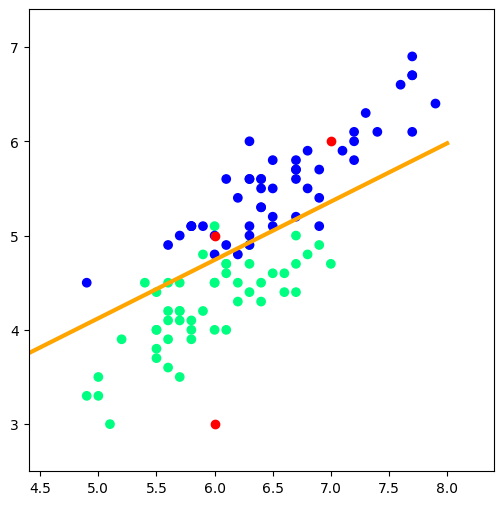

In [ ]:
# Visualise data
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Get the minimum and maximum values of x and y
x_min, x_max = min(X[:,0]), max(X[:,0])
y_min, y_max = min(X[:, 1]), max(X[:, 1])

# Set the limits of the x and y axes based on the data range
plt.xlim(x_min-.5, x_max+.5)
plt.ylim(y_min-.5, y_max+.5)

# Decision Line
x1 = np.linspace(0, 8, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Predict classes of new inputs
new_1=np.array([6,5])
new_2=np.array([6,3])
new_3=np.array([7,6])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [ ]:
#Display confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)
print(cm)

[[9.92930369e-01]
 [9.74990541e-01]
 [9.51809349e-01]
 [9.62274926e-01]
 [9.66989020e-01]
 [6.03445559e-01]
 [8.45733296e-01]
 [9.96675465e-01]
 [9.78972654e-01]
 [9.30741515e-01]
 [9.90697342e-01]
 [9.73246909e-01]
 [9.96149293e-01]
 [6.84570204e-01]
 [9.98769308e-01]
 [9.96988595e-01]
 [4.89129081e-01]
 [9.79763326e-01]
 [9.39146812e-01]
 [9.88472986e-01]
 [2.88851052e-01]
 [9.97573736e-01]
 [5.50626317e-01]
 [6.84570204e-01]
 [9.94299549e-01]
 [9.95222265e-01]
 [9.63350815e-01]
 [7.87073386e-01]
 [8.59342724e-01]
 [9.99633608e-01]
 [9.91313793e-01]
 [9.95874584e-01]
 [9.95404786e-01]
 [6.38573018e-02]
 [2.74849295e-01]
 [8.59342724e-01]
 [9.72208855e-01]
 [9.81090502e-01]
 [9.50412085e-01]
 [9.62274926e-01]
 [5.60289290e-01]
 [8.21128923e-01]
 [9.90329659e-01]
 [9.97905677e-01]
 [9.00607130e-01]
 [9.35070615e-01]
 [9.35070615e-01]
 [9.85724430e-01]
 [9.99860491e-01]
 [9.68215672e-01]
 [3.22993363e-04]
 [2.62936314e-02]
 [2.70740622e-02]
 [6.42625268e-03]
 [3.63838564e-03]
 [1.487477

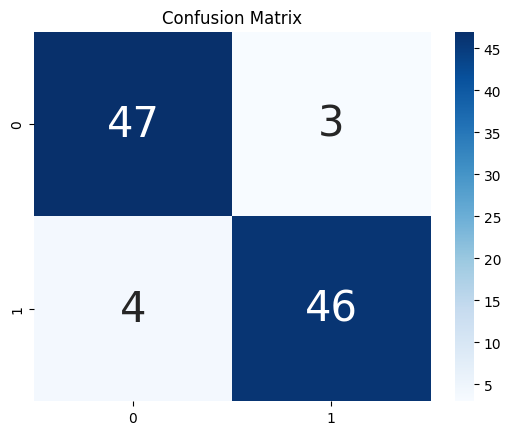

In [ ]:
# Plot confusion matrix
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

## Logistic Regression ScikitLearn

In [ ]:
#Normalizing data
scaler= Normalizer().fit(X) # the scaler is fitted to the  dataset
X= scaler.transform(X) # the scaler is applied to the dataset

In [ ]:
print(y[:5])
y = y.ravel()
print(y[:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [ ]:
#Make an instance of the model
log = LogisticRegression()
#Training the model
log.fit(X, y)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X)

In [ ]:
y_pred1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# the estimated coefficients and bias term
print(log.coef_, log.intercept_)

[[ 1.1312673  -1.46504078]] [0.00638287]


In [ ]:
# Use score method to get accuracy of model
s = log.score(X, y)
s

0.9

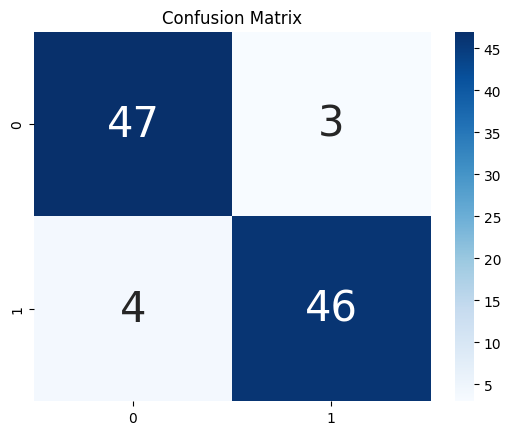

In [ ]:
#visualising the performance of the classification model
cm = confusion_matrix(y, y_pred)
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()